**ロジスティック回帰モデル**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from seaborn import load_dataset

In [2]:
data = load_dataset("titanic")
# data30 = data[data['age'] < 35][data['age'] > 25][data['sex'] == 'male']
# cor = data30.corr()
ave_age = data['age'].mean()
data['age'].fillna(ave_age,inplace=True)
X = data[['fare','age']].values
y = data['survived'].values

In [9]:
#正則化　コスト関数の実装
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sgd(X_train, y_train, max_iter, eta,c):
    w = np.zeros(X_train.shape[1])
    cost = []
    for _ in range(max_iter):
        w_prev = np.copy(w)
        sigma = sigmoid(np.dot(X_train, w))
        grad = np.dot(X_train.T, (sigma - y_train))*c
#         print(grad+ w_prev**2/2)
        w -= eta * (grad + w_prev**2/2)
        cost.append(-np.dot(y_train,np.log(sigma))-np.dot((1-y_train),np.log(1-sigma)))
        if np.allclose(w, w_prev):
            return w
    return w,cost

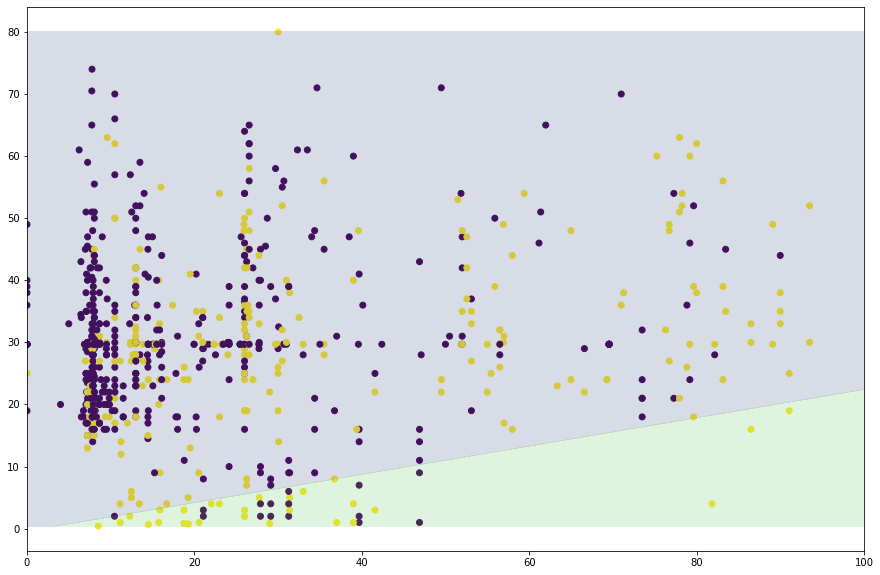

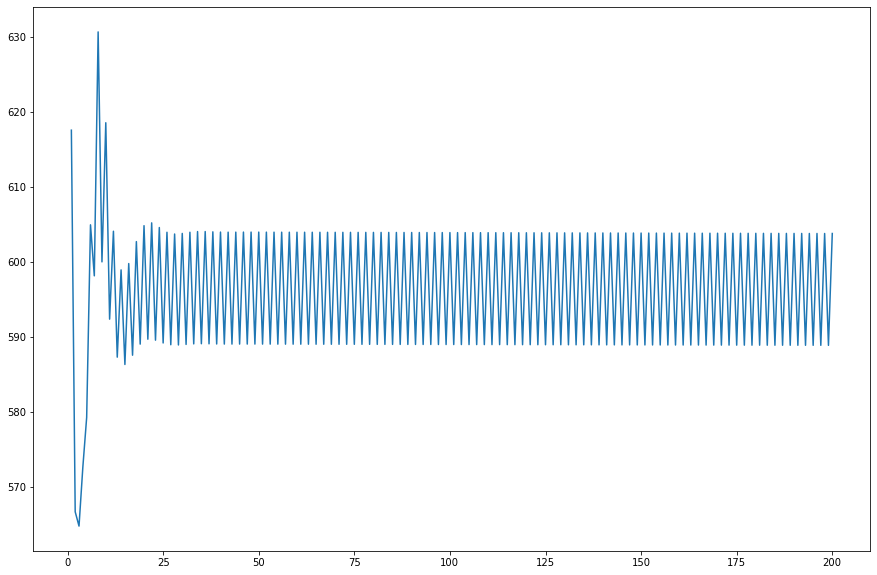

In [10]:
max_iter=200
Xb = np.hstack((np.ones((len(X[:,0]), 1)), X))

w ,cost= sgd(Xb, y, max_iter, 0.00001,0.5)

xx0, xx1 = np.meshgrid(np.linspace(min(X[:,0]), max(X[:,0]), 100), np.linspace(min(X[:,1]), max(X[:,1]), 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T
xxb = np.hstack((np.ones((len(xx[:,0]), 1)), xx))
proba = sigmoid(np.dot(xxb,w))
y_pred = (proba > 0.5).astype(np.int)
fig = plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(xx0, xx1, proba.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim([0,100])
fig = plt.figure(figsize=(15,10))
plt.plot(np.linspace(1,max_iter,max_iter),cost)

In [11]:
# 課題　30歳の生存率
from sklearn.linear_model import LogisticRegression
sex = pd.get_dummies(data['sex'])
mAge = np.hstack((data[['age']].values,sex[['male']]))
model=LogisticRegression(fit_intercept=True)

model.fit(mAge, y)
print( 'survived = ',model.predict_proba([[30,1]])[0,1])

score = model.score(mAge, y)
print(score, 1-y.mean())
cm=confusion_matrix(y, model.predict(X))

survived =  0.1933594115895271
0.7867564534231201 0.6161616161616161


C:\Users\zawaz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


タイタニックのデータセットからロジスティック回帰によって生存かどうかの推論を行った。  
その際、学習に用いるコスト関数に正則化の項を追加した。  
目論見通り重みが過剰に大きな値になることはおさえられたが、収束に関してはあまりうまくいかなかった。  
課題の演習では30歳男性の生存率の推定を行った。  
